In [1]:
# Add local scripts to module search path
import sys
import os
sys.path.append(os.path.realpath('../toliman-proper'))

In [10]:
from proper_tools import form_detector_image
from spirals import binarized_ringed

prescription = 'prescription_rc_quad'
# The actual values probably don't matter all that much for the purposes of this comparison.

beam_ratio = 0.4
gridsize = 2048
def binarized_ringed_650(r, phi):
    phase = 650.*1e-9*0.25
    return binarized_ringed(r, phi, phase)

toliman_settings = {
                    'diam': 0.001 * 2. * 150, 
                    'm1_fl': 571.7300 / 1000.,
                    'm1_m2_sep': 549.240/1000.,
                    'm2_fl': -23.3800/1000.,
                    'bfl': 590.000 / 1000., 
                    'm2_rad': 5.9 / 1000., 
                    'm2_strut_width': 0.01,
                    'm2_supports': 5,
                    'beam_ratio': beam_ratio,
                    'tilt_x': 0.00,
                    'tilt_y': 0.00,
                    'phase_func': binarized_ringed_650
                    }

detector_pitch = 11.0e-6 # m/pixel on detector
npixels = 512 # Size of detector, in pixels

wl_gauss = [5.999989e-01,
            6.026560e-01,
            6.068356e-01,
            6.119202e-01,
            6.173624e-01,
            6.226281e-01,
            6.270944e-01,
            6.300010e-01 ]
weights_gaus = [5.3770e-02,
                1.1224e-01,
                1.5056e-01,
                1.7034e-01,
                1.7342e-01,
                1.5861e-01,
                1.2166e-01,
                5.9360e-02 ]

In [11]:
# First source, on axis
source_a = {
            'wavelengths': [0.6],#wl_gauss[:4],
            'weights': [1.],#weights_gaus[:4],
            'settings': toliman_settings
            }

In [12]:
image = form_detector_image(prescription, [source_a], gridsize, detector_pitch, npixels) #, multi=False)
print(type(image))

Couldn't load file binarized_ringed_650_2048_0.00036621093749999995.npy
<class 'numpy.ndarray'>


/home/ubuntu/miniconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


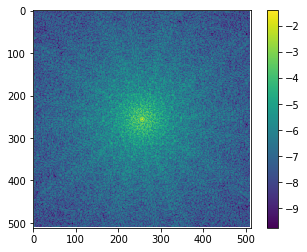

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

s = detector_pitch/1e-6
#plt.imshow(np.log10(np.abs(wavefront[1024-200:1024+200, 1024-200:1024+200])**2),cmap='viridis', extent=[x*s for x in [-200,200,-200,200]])
plt.imshow(np.log10(image),cmap='viridis')
plt.colorbar()
plt.show()

In [19]:
zemax = np.load('../zemax_examples/toliman-RC-f50_SpiralPupil_psf_0deg_600nm.npy')


In [20]:
print(type(zemax))

<class 'numpy.ndarray'>


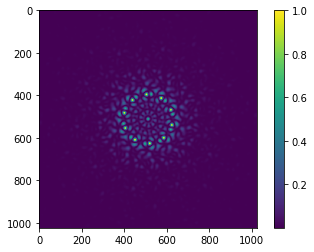

In [22]:
plt.imshow(zemax,cmap='viridis')
plt.colorbar()
plt.show()